# EDA Time Series

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("../data/raw/Alcohol_Sales.csv")
df.columns = ["DATE","SALES"]
df = df.set_index('DATE')
df.index = pd.DatetimeIndex(df.index,freq='MS')

df.head()

,SALES
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


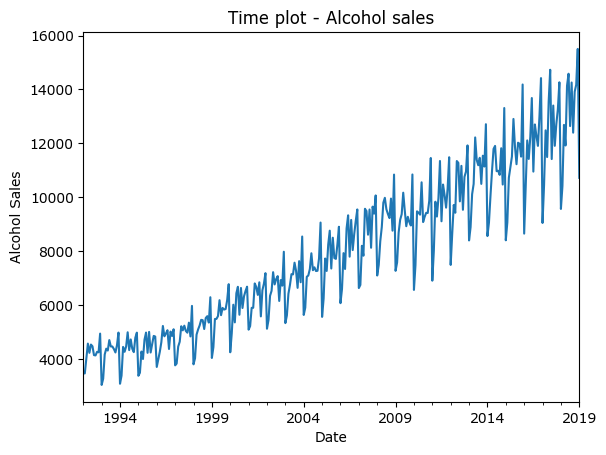

In [3]:
df['SALES'].plot(title="Time plot - Alcohol sales")
plt.xlabel('Date')
plt.ylabel('Alcohol Sales')

plt.show()

This initial plot gives use some initial infomration:  

- There can be **seasonality**
- The serie exhibits an **increasing trend** over the years

## Cheacking for variation

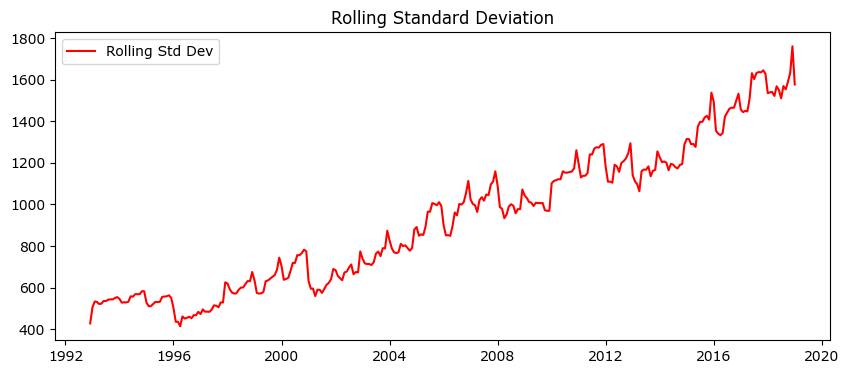

In [4]:
# Assume `ts` is your pandas Series (time series)
rolling_std = df.rolling(window=12).std()

plt.figure(figsize=(10,4))
plt.plot(rolling_std, label="Rolling Std Dev", color="red")
plt.legend()
plt.title("Rolling Standard Deviation")
plt.show()


Data shows an increasing variation through the years, so we need to transform the data in order to take this increase in variation

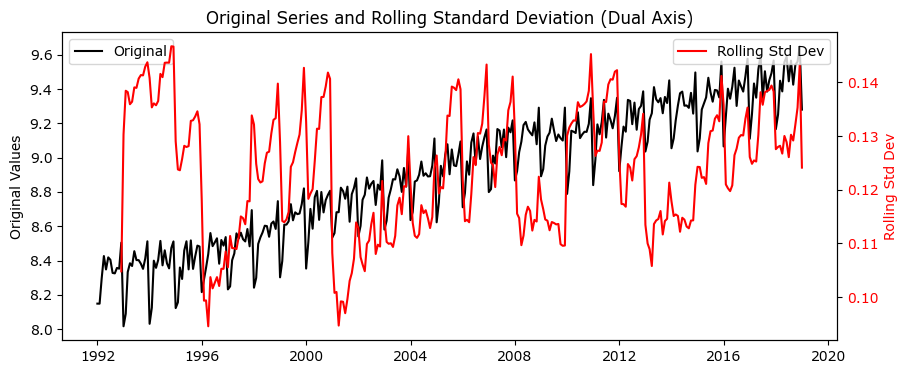

In [5]:
df_ln = df.map(lambda x: math.log(x))

rolling_std_ln = df_ln.rolling(window=12).std()


fig, ax1 = plt.subplots(figsize=(10,4))

# Plot original series
ax1.plot(df_ln, label="Original", color="black")
ax1.set_ylabel("Original Values", color="black")
ax1.tick_params(axis="y", labelcolor="black")

# Create second y-axis for rolling std
ax2 = ax1.twinx()
ax2.plot(rolling_std_ln, label="Rolling Std Dev", color="red")
ax2.set_ylabel("Rolling Std Dev", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title
plt.title("Original Series and Rolling Standard Deviation (Dual Axis)")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [6]:
df_ln.to_csv("../data/preprocessed/dataset_ln.csv")

## Data differenciation

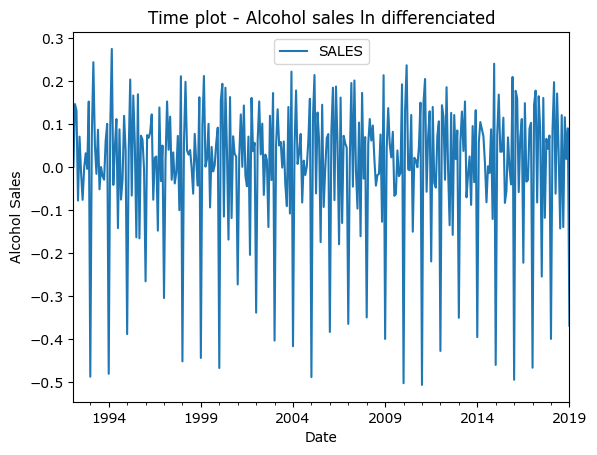

In [7]:
df_ln_diff = df_ln.diff()[1:]

df_ln_diff.plot(title="Time plot - Alcohol sales ln differenciated")
plt.xlabel('Date')
plt.ylabel('Alcohol Sales')

plt.show()

In [8]:
df_ln_diff.to_csv("../data/preprocessed/dataset_ln_diff.csv")

## Checking for Seasonality

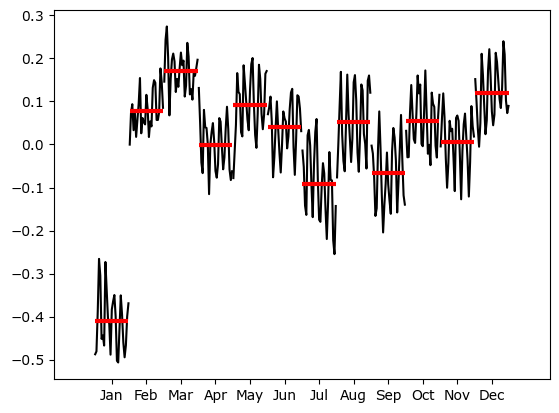

In [9]:
month_plot(df_ln_diff)
plt.show()

We can see there is a pattern where values start lower at the beginning of the year and end higher at the end 

## Autocorrelation Plots and Partial Autocorrelation

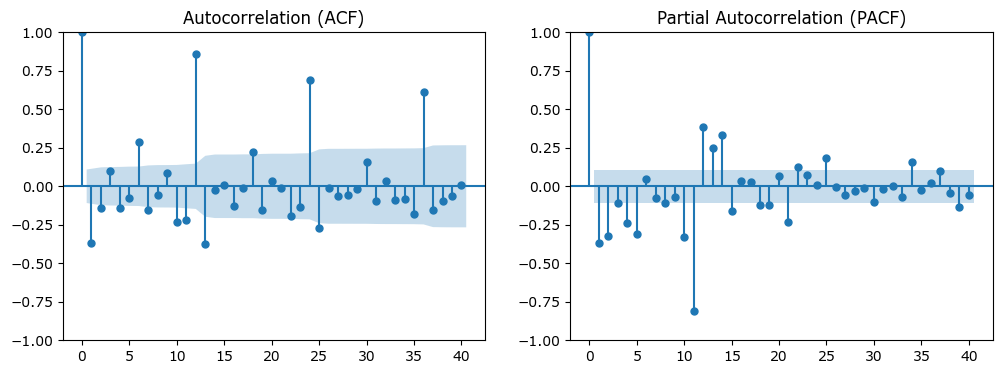

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df_ln_diff, lags=40, ax=axes[0])   # ACF
plot_pacf(df_ln_diff, lags=40, ax=axes[1], method="ywm")

axes[0].set_title("Autocorrelation (ACF)")
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.show()

1. ACF:  
    1. The seasonal lags are higher, we can see a small peak at the 7th lag and a larger one at the 13th
    2. Also, as the data has a trend, the autocorrelation for small lags is larger and positive
2. PACF: